In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\NASA\\karimnagar_nasa.csv") # Loading data

In [15]:
df

,Date,temp_max,rainfall
0,1/1/1991,30.90,0.00
1,2/1/1991,30.52,0.11
2,3/1/1991,27.10,0.06
3,4/1/1991,28.38,0.00
4,5/1/1991,29.20,0.00
...,...,...,...
11683,27/12/2022,29.17,1.76
11684,28/12/2022,29.71,3.93
11685,29/12/2022,28.96,0.01
11686,30/12/2022,29.76,0.00


In [4]:
df.describe()

,temp_max,rainfall
count,11688.000000,11688.000000
mean,33.987340,2.607681
std,5.209548,7.302543
min,19.950000,0.000000
25%,30.030000,0.000000
50%,32.350000,0.020000
75%,37.850000,1.440000
max,48.190000,129.210000


In [16]:
df['Date']= pd.to_datetime(df.Date, format="%d/%m/%Y")
df= df.set_index('Date')

In [28]:
df

,temp_max,rainfall
date,,
1991-01-01,30.90,0.00
1991-01-02,30.52,0.11
1991-01-03,27.10,0.06
1991-01-04,28.38,0.00
1991-01-05,29.20,0.00
...,...,...
2022-12-27,29.17,1.76
2022-12-28,29.71,3.93
2022-12-29,28.96,0.01


In [29]:
print(pd.infer_freq(df.index))

D


In [17]:
df['rainfall']=df['rainfall']/130
df['temp_max']=df['temp_max']/50

In [31]:
df1=df[:10958]
df1

,temp_max,rainfall
date,,
1991-01-01,0.6180,0.000000
1991-01-02,0.6104,0.000846
1991-01-03,0.5420,0.000462
1991-01-04,0.5676,0.000000
1991-01-05,0.5840,0.000000
...,...,...
2020-12-27,0.5596,0.000000
2020-12-28,0.5556,0.000000
2020-12-29,0.5576,0.000000


In [13]:
def create_data(df, lookback=365):
    df_np= df.to_numpy()
    X=[]
    y=[]
    
    for i in range(len(df_np)-2*lookback):
        row = [x for x in df_np[i:i+lookback]]
        X.append(row)
        label = [z[0] for z in df_np[i+lookback:i+(2*lookback)]]
        y.append(label)
    return np.array(X), np.array(y)

In [32]:
X,y = create_data(df1)

In [33]:
X.shape, y.shape

((10228, 365, 2), (10228, 365))

In [34]:
X_train, y_train, X_test, y_test = X[:9863], y[:9863], X[9863:], y[9863:]
X_train, y_train, X_val, y_val= X_train[:9133], y_train[:9133], X_train[9133:9863], y_train[9133:9863]

In [35]:
len(X_train), len(X_val), len(X_test)

(9133, 730, 365)

In [36]:
X_train.shape, y_train.shape

((9133, 365, 2), (9133, 365))

In [19]:
#importing necessary libraries to create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [37]:
karimnagar_temp= Sequential([
    InputLayer((365,2)),
    LSTM(units=128),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(365, activation='relu'),  
])

karimnagar_temp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               67072     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               66048     
                                                                 
 dense_5 (Dense)             (None, 365)               187245    
                                                                 
Total params: 320,365
Trainable params: 320,365
Non-trainable params: 0
_________________________________________________________________


In [38]:
karimnagar_cp= ModelCheckpoint('karimnagar_temp/', save_best_only=True)
karimnagar_temp.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(),
    metrics=[RootMeanSquaredError()]
)
epochs=200
history=karimnagar_temp.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, callbacks=[karimnagar_cp])

Epoch 1/200
286/286 [==============================] - ETA: 0s - loss: 0.0708 - root_mean_squared_error: 0.2661

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 24s 76ms/step - loss: 0.0708 - root_mean_squared_error: 0.2661 - val_loss: 0.0554 - val_root_mean_squared_error: 0.2355
Epoch 2/200
286/286 [==============================] - ETA: 0s - loss: 0.0477 - root_mean_squared_error: 0.2183

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0477 - root_mean_squared_error: 0.2183 - val_loss: 0.0383 - val_root_mean_squared_error: 0.1958
Epoch 3/200
285/286 [============================>.] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.1651

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0273 - root_mean_squared_error: 0.1651 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1504
Epoch 4/200
285/286 [============================>.] - ETA: 0s - loss: 0.0220 - root_mean_squared_error: 0.1484

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1444
Epoch 5/200
285/286 [============================>.] - ETA: 0s - loss: 0.0204 - root_mean_squared_error: 0.1427

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0204 - root_mean_squared_error: 0.1427 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1405
Epoch 6/200
285/286 [============================>.] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.1369

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0187 - root_mean_squared_error: 0.1369 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 7/200
285/286 [============================>.] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1344

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 8/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0180 - root_mean_squared_error: 0.1341 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 9/200
285/286 [============================>.] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.1340

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0180 - root_mean_squared_error: 0.1340 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1348
Epoch 10/200
285/286 [============================>.] - ETA: 0s - loss: 0.0179 - root_mean_squared_error: 0.1339

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1340
Epoch 11/200
285/286 [============================>.] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1329

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0177 - root_mean_squared_error: 0.1329 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1291
Epoch 12/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0166 - root_mean_squared_error: 0.1288 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1292
Epoch 13/200
285/286 [============================>.] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1247

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0155 - root_mean_squared_error: 0.1247 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1232
Epoch 14/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244
Epoch 15/200
285/286 [============================>.] - ETA: 0s - loss: 0.0140 - root_mean_squared_error: 0.1184

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 22s 75ms/step - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1176
Epoch 16/200
285/286 [============================>.] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1151

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121
Epoch 17/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1123
Epoch 18/200
285/286 [============================>.] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1123

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 19/200
286/286 [==============================] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.1084

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0117 - root_mean_squared_error: 0.1084 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002
Epoch 20/200
285/286 [============================>.] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.0999

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 23s 79ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 21/200
285/286 [============================>.] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.1000

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 22s 75ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0992
Epoch 22/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0995
Epoch 23/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002
Epoch 24/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 25/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0099 - root_mean_squared_error: 0.0997 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0996
Epoch 26/200
285/286 [============================>.] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.0888

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 75ms/step - loss: 0.0079 - root_mean_squared_error: 0.0888 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0863
Epoch 27/200
286/286 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.0855

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0073 - root_mean_squared_error: 0.0855 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 28/200
285/286 [============================>.] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.0855

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0073 - root_mean_squared_error: 0.0855 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0854
Epoch 29/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0073 - root_mean_squared_error: 0.0855 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0857
Epoch 30/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0073 - root_mean_squared_error: 0.0854 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 31/200
286/286 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.0853

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0073 - root_mean_squared_error: 0.0853 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0849
Epoch 32/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0073 - root_mean_squared_error: 0.0852 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 33/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0073 - root_mean_squared_error: 0.0852 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 34/200
286/286 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0820

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0782
Epoch 35/200
286/286 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0751

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 72ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 36/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0046 - root_mean_squared_error: 0.0680 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0690
Epoch 37/200
285/286 [============================>.] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0626

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585
Epoch 38/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0616
Epoch 39/200
285/286 [============================>.] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0571

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 72ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 40/200
285/286 [============================>.] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0587

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 22s 75ms/step - loss: 0.0035 - root_mean_squared_error: 0.0587 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0577
Epoch 41/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603
Epoch 42/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 43/200
285/286 [============================>.] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0471

INFO:tensorflow:Assets written to: karimnagar_temp\assets


INFO:tensorflow:Assets written to: karimnagar_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0022 - root_mean_squared_error: 0.0471 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 44/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0019 - root_mean_squared_error: 0.0441 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0473
Epoch 45/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0019 - root_mean_squared_error: 0.0441 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 46/200
286/286 [==============================] - 16s 57ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0458
Epoch 47/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0019 - root_mean_squared_error: 0.0436 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 48/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434 - val_loss: 0.

Epoch 90/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 91/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0014 - root_mean_squared_error: 0.0376 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 92/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 93/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0478
Epoch 94/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0479
Epoch 95/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_l

286/286 [==============================] - 7s 25ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0480
Epoch 183/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0473
Epoch 184/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 185/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 186/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 187/200
286/286 [==============================] - 7s 25ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0

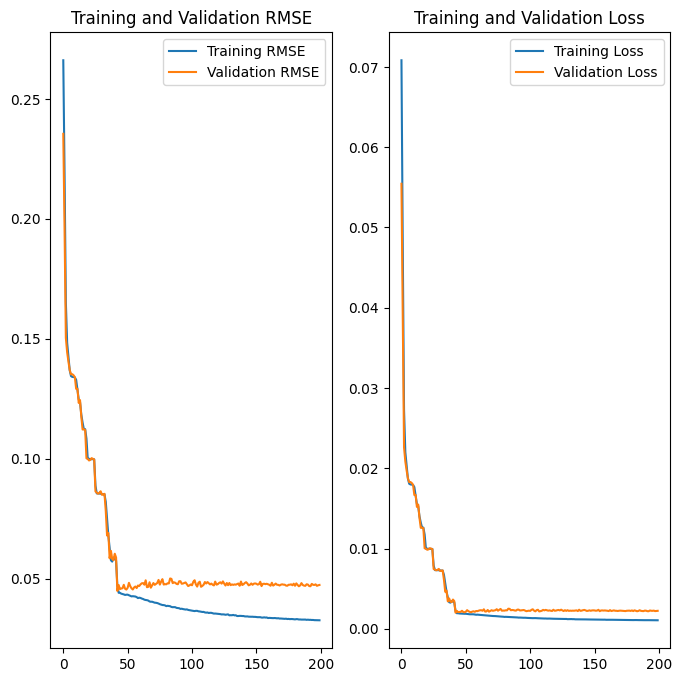

In [39]:
acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training RMSE')
plt.plot(epochs_range, val_acc, label='Validation RMSE')
plt.legend(loc='upper right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
res=karimnagar_temp.evaluate(X_test,y_test)

12/12 [==============================] - 0s 11ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628


In [56]:
import pickle

In [61]:
pickle.dump(karimnagar_temp, open('C:\\Users\\Lenovo\\Desktop\\NASSCOM\\models\\karimnagar.pkl', 'wb')) # Writing to pickle file 

INFO:tensorflow:Assets written to: ram://3efce8f9-0295-411d-a0ec-0ff190cb16bd/assets


INFO:tensorflow:Assets written to: ram://3efce8f9-0295-411d-a0ec-0ff190cb16bd/assets


In [62]:
from tensorflow import keras

In [63]:
karimnagar_temp.save("karim_heat.h5", save_format='h5') # Saving model to h5 format to use it or call it later

In [42]:
test_x=df[10958:11323]
display(test_x)
test_x=test_x.to_numpy()
test_x=test_x.reshape(1,365,2)
test_x

,temp_max,rainfall
date,,
2021-01-01,0.5330,0.000000
2021-01-02,0.5216,0.000000
2021-01-03,0.5438,0.000000
2021-01-04,0.5450,0.000000
2021-01-05,0.5726,0.000000
...,...,...
2021-12-27,0.5626,0.000000
2021-12-28,0.5642,0.004692
2021-12-29,0.5674,0.003538


array([[[5.33000000e-01, 0.00000000e+00],
        [5.21600000e-01, 0.00000000e+00],
        [5.43800000e-01, 0.00000000e+00],
        [5.45000000e-01, 0.00000000e+00],
        [5.72600000e-01, 0.00000000e+00],
        [5.83000000e-01, 7.07692308e-03],
        [5.77600000e-01, 9.23076923e-04],
        [5.95400000e-01, 0.00000000e+00],
        [5.91600000e-01, 0.00000000e+00],
        [6.11000000e-01, 0.00000000e+00],
        [6.33800000e-01, 0.00000000e+00],
        [6.26800000e-01, 0.00000000e+00],
        [6.18800000e-01, 0.00000000e+00],
        [6.14400000e-01, 0.00000000e+00],
        [6.17400000e-01, 0.00000000e+00],
        [6.21600000e-01, 0.00000000e+00],
        [6.12400000e-01, 0.00000000e+00],
        [6.03800000e-01, 0.00000000e+00],
        [6.22400000e-01, 0.00000000e+00],
        [6.41000000e-01, 0.00000000e+00],
        [6.36200000e-01, 0.00000000e+00],
        [6.26000000e-01, 0.00000000e+00],
        [6.30800000e-01, 0.00000000e+00],
        [6.57800000e-01, 0.0000000

In [43]:
test_y=df['temp_max'][11323:]
test_y=test_y.to_numpy()
test_y

array([0.571 , 0.5744, 0.5682, 0.5746, 0.5752, 0.5836, 0.5894, 0.582 ,
       0.5764, 0.5692, 0.5462, 0.5162, 0.5482, 0.5574, 0.5294, 0.5514,
       0.5426, 0.5508, 0.5456, 0.5696, 0.604 , 0.6212, 0.5744, 0.534 ,
       0.5096, 0.5242, 0.5246, 0.5206, 0.538 , 0.586 , 0.6182, 0.6128,
       0.6376, 0.648 , 0.5902, 0.591 , 0.603 , 0.6238, 0.6216, 0.6242,
       0.6052, 0.6004, 0.6124, 0.6302, 0.6366, 0.6364, 0.6208, 0.6316,
       0.6414, 0.6614, 0.7182, 0.703 , 0.705 , 0.7   , 0.708 , 0.7036,
       0.7002, 0.7016, 0.7056, 0.7228, 0.7162, 0.7244, 0.7236, 0.7296,
       0.7334, 0.7248, 0.7374, 0.7514, 0.745 , 0.7518, 0.6946, 0.756 ,
       0.7744, 0.7866, 0.8276, 0.841 , 0.8196, 0.7998, 0.8104, 0.8232,
       0.8178, 0.8204, 0.8214, 0.8192, 0.8394, 0.8474, 0.8458, 0.8622,
       0.8608, 0.8616, 0.8546, 0.8104, 0.8228, 0.8158, 0.8112, 0.8274,
       0.8102, 0.8   , 0.8194, 0.8214, 0.8452, 0.8482, 0.8438, 0.8246,
       0.8402, 0.7796, 0.8124, 0.8246, 0.8502, 0.8368, 0.8344, 0.7566,
      

In [44]:
predictions=karimnagar_temp.predict(test_x)

1/1 [==============================] - 1s 753ms/step


In [45]:
predictions= predictions.reshape(365)
predictions= pd.DataFrame(data=predictions, index=df[11323:].index)

In [46]:
predictions.shape

(365, 1)

In [47]:
predictions=predictions*50

In [48]:
expected=pd.DataFrame(data=test_y, index=df[11323:].index, columns=["temp_max_actual"])

In [49]:
expected=expected*50

In [64]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape # importing the error specifying libraries

In [65]:
rmse= mse(expected, predictions, squared=False)
print(rmse)
mae1= mae(expected, predictions)
print(mae1)
mape1= mape(expected, predictions)
print(mape1)

3.120813369447711
2.611383986381635
0.08708193860524625


In [53]:
prediction_low=predictions-mae1
prediction_upper=predictions+mae1

In [54]:
prediction_upper.columns=['upper bound temp']
prediction_low.columns=['lower bound temp']
predictions.columns=['predicted temp']

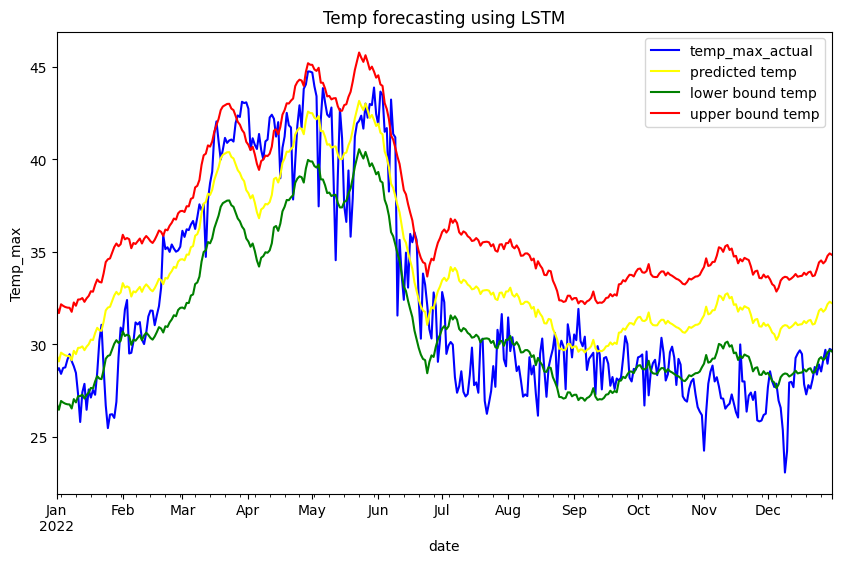

In [55]:
ax = expected.plot(
    figsize=(10, 6),
    color="blue",
    title="Temp forecasting using LSTM",
)
ax.set_ylabel("Temp_max")
ax.set_xlabel("Year")

predictions.plot(ax=ax, color="yellow")     
prediction_low.plot(ax=ax, color="green")
prediction_upper.plot(ax=ax, color="red")
plt.show()

In [7]:
from tensorflow import keras

In [8]:
model = keras.models.load_model("karim_heat.h5") # Loading our saved model to check 

In [9]:
test_x1=df[11323:]
display(test_x1)
test_x1=test_x1.to_numpy()
test_x1=test_x1.reshape(1,365,2)
test_x1

,temp_max,rainfall
date,,
2022-01-01,0.5710,0.000000
2022-01-02,0.5744,0.000000
2022-01-03,0.5682,0.000000
2022-01-04,0.5746,0.000000
2022-01-05,0.5752,0.000000
...,...,...
2022-12-27,0.5834,0.013538
2022-12-28,0.5942,0.030231
2022-12-29,0.5792,0.000077


array([[[5.71000000e-01, 0.00000000e+00],
        [5.74400000e-01, 0.00000000e+00],
        [5.68200000e-01, 0.00000000e+00],
        [5.74600000e-01, 0.00000000e+00],
        [5.75200000e-01, 0.00000000e+00],
        [5.83600000e-01, 0.00000000e+00],
        [5.89400000e-01, 0.00000000e+00],
        [5.82000000e-01, 0.00000000e+00],
        [5.76400000e-01, 5.15384615e-03],
        [5.69200000e-01, 7.93076923e-02],
        [5.46200000e-01, 9.66153846e-02],
        [5.16200000e-01, 9.72307692e-02],
        [5.48200000e-01, 3.00769231e-02],
        [5.57400000e-01, 4.69230769e-02],
        [5.29400000e-01, 8.61538462e-03],
        [5.51400000e-01, 2.30769231e-03],
        [5.42600000e-01, 1.31923077e-01],
        [5.50800000e-01, 6.84615385e-03],
        [5.45600000e-01, 0.00000000e+00],
        [5.69600000e-01, 0.00000000e+00],
        [6.04000000e-01, 0.00000000e+00],
        [6.21200000e-01, 0.00000000e+00],
        [5.74400000e-01, 0.00000000e+00],
        [5.34000000e-01, 0.0000000

In [10]:
pred1= model.predict(test_x1)

1/1 [==============================] - 3s 3s/step


In [18]:
pred1 = pred1.reshape(365)
pred2 = pd.DataFrame(data=pred1,index=df[11323:].index, columns=['temp_max'])
pred2["temp_max"] = pred2["temp_max"]*50 
pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')
pred2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7660\2431198317.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')


,temp_max,date
Date,,
2022-01-01,29.010355,2023-01-01
2022-01-02,28.858339,2023-01-02
2022-01-03,29.407036,2023-01-03
2022-01-04,29.417233,2023-01-04
2022-01-05,29.536449,2023-01-05
...,...,...
2022-12-27,30.147308,2023-12-27
2022-12-28,30.320198,2023-12-28
2022-12-29,30.502914,2023-12-29


In [19]:
pred4=pred2.copy()
pred4=pred4.set_index('date')
pred4.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\karimnagar_prediction_temp.csv")

In [20]:
norm= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Normals\\temp_normals.csv")

In [21]:
pred2= pred2.loc[(pred2['temp_max']>=40)]
pred2= pred2.sort_values(by=['date'])
pred2['month']=pred2['date'].dt.month
pred2['normal']=pred2['month'].astype(float)


In [22]:
for i in range(len(pred2['temp_max'])):
    pred2['normal'][i] = float(norm['Karimnagar'][int(pred2["month"][i])-1]) 
pred2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7660\2269037652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred2['normal'][i] = float(norm['Karimnagar'][int(pred2["month"][i])-1])


,temp_max,date,month,normal
Date,,,,
2022-04-16,40.245605,2023-04-16,4,39.5
2022-04-17,40.711765,2023-04-17,4,39.5
2022-04-18,41.014343,2023-04-18,4,39.5
2022-04-19,41.395901,2023-04-19,4,39.5
2022-04-20,41.279461,2023-04-20,4,39.5
2022-04-21,41.488380,2023-04-21,4,39.5
2022-04-22,41.515041,2023-04-22,4,39.5
2022-04-23,41.949757,2023-04-23,4,39.5
2022-04-24,41.941357,2023-04-24,4,39.5


In [23]:
pred2["diff"]= pred2['temp_max']-pred2['normal']
pred2

,temp_max,date,month,normal,diff
Date,,,,,
2022-04-16,40.245605,2023-04-16,4,39.5,0.745605
2022-04-17,40.711765,2023-04-17,4,39.5,1.211765
2022-04-18,41.014343,2023-04-18,4,39.5,1.514343
2022-04-19,41.395901,2023-04-19,4,39.5,1.895901
2022-04-20,41.279461,2023-04-20,4,39.5,1.779461
2022-04-21,41.488380,2023-04-21,4,39.5,1.988380
2022-04-22,41.515041,2023-04-22,4,39.5,2.015041
2022-04-23,41.949757,2023-04-23,4,39.5,2.449757
2022-04-24,41.941357,2023-04-24,4,39.5,2.441357


In [29]:
pred3=pred2.loc[((pred2['normal']<=40) & (pred2['diff']>=5)) | ((pred2['normal']>=40) & (pred2['diff']>=4)) | (pred2['temp_max']>=45)]
pred3["heat"]=(pred3["temp_max"]).astype(str)
pred3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7660\2844977100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred3["heat"]=(pred3["temp_max"]).astype(str)


,temp_max,date,month,normal,diff,heat
Date,,,,,,
2022-06-02,41.817101,2023-06-02,6,36.7,5.117101,41.8171
2022-06-03,42.200661,2023-06-03,6,36.7,5.500661,42.20066


In [30]:
for i in range(len(pred3['temp_max'])):
    if (((pred3['normal'][i]<=40) & (pred2['diff'][i]<7)) | ((pred2['normal'][i]>40) & (pred2['diff'][i]<6))):
        pred3['heat'][i]='Warning! Heatwave expected'
    elif (((pred3['normal'][i]<=40) & (pred2['diff'][i]>=7)) | ((pred2['normal'][i]>40) & (pred2['diff'][i]>=6)) | (pred2['temp_max']>=45)):
        pred3['heat'][i]='Warning! Severe Heatwave expected'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7660\1608767477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred3['heat'][i]='Warning! Heatwave expected'


In [31]:
pred3=pred3.set_index('date')
pred3=pred3.drop(['month', 'normal', 'diff'], axis=1)
pred3 # Final data frame containing prediction of the date of heatwave for Karimnagar district

,temp_max,heat
date,,
2023-06-02,41.817101,Warning! Heatwave expected
2023-06-03,42.200661,Warning! Heatwave expected


In [32]:
pred3.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\karimnagar_heatwave_prediction.csv") # Saving to a  csv file